In [1]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM

z = 1.        # Redshift
dz = 0.1      # Width of redshift interval
area = 1.     # Area of sky in square degrees
lum = 1.e+26  # Radio luminosity in W/Hz
alpha = -0.7  # Spectral index, I_v \propto nu^alpha

# Cosmology calculator assuming flat LCDM, H_0 = 70 km/s/Mpc, Omega_m = 0.3, Omega_L = 0.7
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)

# Minimum and maximum redshift of bin
zmin = z - 0.5*dz
zmax = z + 0.5*dz

# Star formation rate density, Madau & Dickinson arXiv:1403.0007 Eq.15
# This is a density per comoving volume
# Units are M_solar/yr/Mpc^3
psi = 0.015*((1+z)**2.7)/(1+((1+z)/2.9)**5.6)

# Comoving volume in Mpc^3 in this area and redshift range
dvol = (cosmo.comoving_volume(zmax).value-cosmo.comoving_volume(zmin).value)*(area/(4.*np.pi*((180./np.pi)**2)))

# Cosmic time range in Gyr corresponding to this redshift range
t1 = cosmo.age(zmax).value
t2 = cosmo.age(zmin).value
# Time interval in yr
dt = (t2-t1)*1.e+9

# This is proportional to the number of FRBs to generate
# (would need scaling factor!)
nfrb = psi*dvol*dt

# Luminosity distance in Mpc
dl = cosmo.luminosity_distance(z).value
# Convert to metres
dl *= 3.086e+22

# FRB flux density in W/m^2/Hz
# See for example Eq.1 of arXiv:2503.04717
# Agrees with Wikipedia!
flux = lum/(4.*np.pi*(dl**2)*((1+z)**(-1-alpha)))
# Convert to Janskys
flux *= 1.e+26

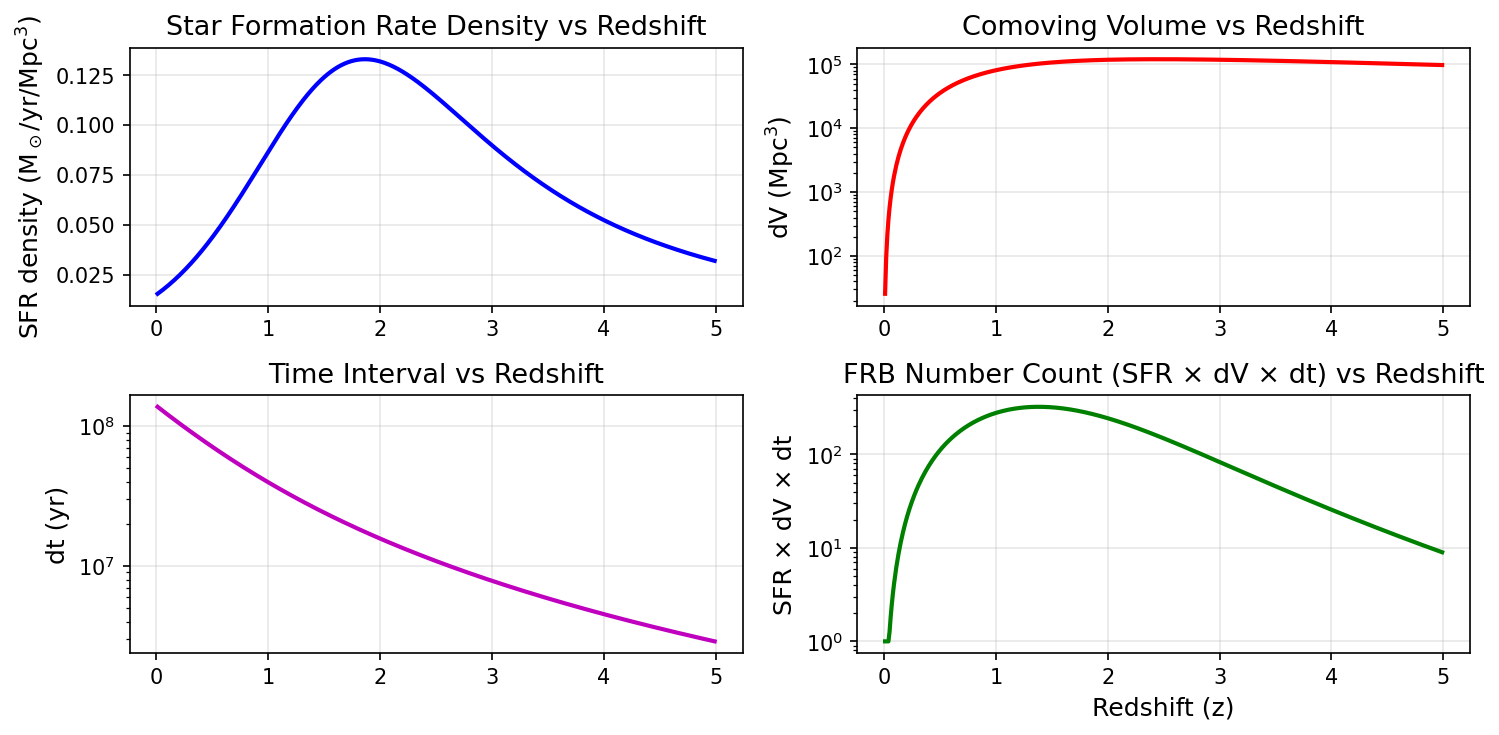

In [17]:
import matplotlib.pyplot as plt

# Redshift range and bin width
z_array = np.arange(0.01, 5.0, 0.01)
dz = 0.01

# Arrays to store results
psi_array = []
dvol_array = []
dt_array = []
nfrb_array = []

# Loop through redshift bins
for z in z_array:
    zmin = z - 0.5*dz
    zmax = z + 0.5*dz
    
    # Star formation rate density
    psi = 0.015*((1+z)**2.7)/(1+((1+z)/2.9)**5.6)
    psi_array.append(psi)
    
    # Comoving volume
    dvol = (cosmo.comoving_volume(zmax).value - cosmo.comoving_volume(zmin).value) * (area/(4.*np.pi*((180./np.pi)**2)))
    dvol_array.append(dvol)
    
    # Cosmic time interval
    t1 = cosmo.age(zmax).value
    t2 = cosmo.age(zmin).value
    dt = (t2-t1)*1.e+9
    dt_array.append(dt)
    
    fscale = 1e-9
    # Number of FRBs
    nfrb = psi * dvol * dt * fscale
    nfrb = max(nfrb, 1)  # Set minimum to 1
    nfrb_array.append(nfrb)

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(10, 5), dpi = 150)

# Plot 1: SFR vs z
axes[0,0].plot(z_array, psi_array, 'b-', linewidth=2)
axes[0,0].set_ylabel('SFR density (M$_\odot$/yr/Mpc$^3$)', fontsize=12)
axes[0,0].set_title('Star Formation Rate Density vs Redshift', fontsize=13)
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Comoving Volume vs z
axes[0,1].plot(z_array, dvol_array, 'r-', linewidth=2)
axes[0,1].set_ylabel('dV (Mpc$^3$)', fontsize=12)
axes[0,1].set_title('Comoving Volume vs Redshift', fontsize=13)
axes[0,1].set_yscale('log')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Time Interval vs z
axes[1,0].plot(z_array, dt_array, 'm-', linewidth=2)
axes[1,0].set_ylabel('dt (yr)', fontsize=12)
axes[1,0].set_title('Time Interval vs Redshift', fontsize=13)
axes[1,0].set_yscale('log')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: FRB Number Count vs z
axes[1,1].plot(z_array, nfrb_array, 'g-', linewidth=2)
axes[1,1].set_xlabel('Redshift (z)', fontsize=12)
axes[1,1].set_ylabel('SFR × dV × dt', fontsize=12)
axes[1,1].set_title('FRB Number Count (SFR × dV × dt) vs Redshift', fontsize=13)
axes[1,1].set_yscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
for z in z_array:
    zmin = z - 0.5 * dz
    zmax = z + 0.5 * dz
    
    # Calculate SFR and volumes
    psi = 0.015 * ((1+z)**2.7) / (1 + ((1+z)/2.9)**5.6)
    dvol = (cosmo.comoving_volume(zmax).value - cosmo.comoving_volume(zmin).value) * \
           (area / (4.*np.pi*((180./np.pi)**2)))
    
    t1 = cosmo.age(zmax).value
    t2 = cosmo.age(zmin).value
    dt = (t2 - t1) * 1.e+9
    
    # Number of FRBs in this shell
    nfrb_shell = psi * dvol * dt
    nfrb_shell = max(nfrb_shell, 1)  # Set minimum to 1
    nfrb_shell = int(np.round(nfrb_shell))
    print (nfrb_shell)

16659403
117122905
318901237
622654104
1028871600
1537877479
2149832730
2864739415
3682444765
4602645506
5624892374
6748594827
7973025899
9297327197
10720514009
12241480501
13859004988
15571755258
17378293924
19277083794
21266493243
23344801560
25510204267
27760818392
30094687676
32509787717
35004031023
37575271979
40221311702
42939902799
45728753994
48585534640
51507879096
54493390974
57539647241
60644202187
63804591245
67018334663
70282941032
73595910670
76954738850
80356918885
83799945074
87281315488
90798534632
94349115949
97930584202
101540477710
105176350457
108835774074
112516339695
116215659689
119931369286
123661128074
127402621404
131153561680
134911689553
138674775020
142440618429
146207051401
149971937665
153733173820
157488690018
161236450579
164974454540
168700736147
172413365279
176110447825
179790126013
183450578685
187090021533
190706707295
194298925911
197865004653
201403308213
204912238775
208390236050
211835777298
215247377322
218623588453
221963000508
225264240740
